FINAL PROJECT Module 1: Identify a data source for your final project and import it
into a format readable by SKLearn. Submit the name of the data source and a PKL file or
executable Python script that will provide access to the data source.

FINAL PROJECT Module 2: Fit a logistic regression model or a linear regression model
to the data source you identified in Module #1. Use the AIC and/or BIC criteria, and K-
Fold cross validation to determine a best-fitting model. Interpret the coefficients of the
model in the context of your chosen dataset and write a short paragraph describing your
findings. (usually k : 3,5,10)

FINAL PROJECT Module 3: Fit Naïve Bayes, MaxEnt, and Support Vector
classifiers to your dataset identified in Module #1. Using your knowledge of this
dataset, choose a metric to score the quality of your classifiers and justify your
choice of metric in the context of a specific problem that your data would address.
Indicate which classifier achieves the highest scores and speculate why this might be
the case given your knowledge of the dataset. Finally, provide contingency tables
and plots of the ROC curve for each classifier and indicate the strengths and
weaknesses of each classifier for your specific dataset.

In [24]:
#Block 1
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle

df_fashion = pd.read_csv("fashion_mnist_test.csv")

#Shuffing and down sampling the data
df_fashion = shuffle(df_fashion)
df_fashion = df_fashion[:10000]

classes             = {0: 'T-shirt/top', 
                       1: 'Trouser', 
                       2: 'Pullover', 
                       3: 'Dress', 
                       4: 'Coat',
                       5: 'Sandal', 
                       6: 'Shirt', 
                       7: 'Sneaker', 
                       8: 'Bag', 
                       9: 'Ankle boot'
                      }
len_classes         = len(classes)
classes_fashion     = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                       'Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(df_fashion.shape)

#Data Cleaning
df_fashion.dropna(how = 'any', inplace = True)
#All clean data

X = df_fashion.loc[:,df_fashion.columns != "label"].values
Y = df_fashion["label"].values
print(X.shape,Y.shape)

print(df_fashion.head())

(10000, 785)
(10000, 784) (10000,)
      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
4219      9       0       0       0       0       0       0       0       0   
8490      4       0       0       0       0       0       0       0       0   
7996      7       0       0       0       0       0       0       0       0   
9040      5       0       0       0       0       0       0       0       0   
7687      8       0       0       0       0       0       0       0       0   

      pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
4219       0    ...            0         0         0         0         0   
8490       2    ...            0         0         0         0       180   
7996       0    ...            0         0         0         0         0   
9040       0    ...            0         0         0         0         0   
7687       0    ...           18        20        29        30         0   

      pixel780  pixel781  pixel78

In [26]:
#Block 2
#Logistic Regression on the data
import pandas as pd
import numpy as np
import time
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score

accres=[]
agg_cm_lr = np.zeros(shape =(10,10))

cv  = cross_validation.KFold(len(X), n_folds = 7)

start = time.time()
for ix, (traincv,testcv) in enumerate(cv):
    lr = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")#, C=10)
    lr.fit(X[traincv],Y[traincv])
    pred_y_lr = lr.predict(X[testcv])
    #Calculating Accuracy
    accres.append(accuracy_score(pred_y_lr,Y[testcv]))
    
    #Confusion matrix
    cm_lr = confusion_matrix(Y[testcv],pred_y_lr)
    #print(cm_lr)
    agg_cm_lr += cm_lr
    
end = time.time()
pred_y_lr = lr.predict(X[testcv])
print("Logistic Regression - 7 fold scores are: ", accres)
print("Average Accuracy: ",np.mean(accres))
print(classification_report(pred_y_lr,Y[testcv]))
print("\n ------------------Contingency Table-------------------")
print(agg_cm_lr)
print("\n ------------------------------------------------------")
print("Time taken for the algorithm : ", end-start, " s")

Logistic Regression - 7 fold scores are:  [0.8264520643806857, 0.8355493351994402, 0.821553533939818, 0.8495451364590623, 0.8410364145658263, 0.8326330532212886, 0.803921568627451]
Average Accuracy:  0.8300987294847959
             precision    recall  f1-score   support

          0       0.73      0.69      0.71       140
          1       0.96      0.95      0.96       137
          2       0.72      0.70      0.71       155
          3       0.79      0.83      0.81       128
          4       0.74      0.70      0.72       162
          5       0.92      0.92      0.92       145
          6       0.46      0.57      0.51       127
          7       0.88      0.88      0.88       146
          8       0.96      0.90      0.93       147
          9       0.93      0.91      0.92       141

avg / total       0.81      0.80      0.81      1428


 ------------------Contingency Table-------------------
[[776.   9.  27.  42.  10.   0. 117.   0.  18.   1.]
 [  1. 964.   5.  19.   2.   2. 

Logistic Regression - 7 fold scores are:  [0.8320503848845346, 0.8376487053883834, 0.8306508047585724, 0.8369489153254024, 0.8235294117647058, 0.8109243697478992, 0.819327731092437]
Average Accuracy:  0.8272971889945621
             precision    recall  f1-score   support

          0       0.73      0.77      0.75       150
          1       0.98      0.95      0.97       138
          2       0.76      0.66      0.71       144
          3       0.85      0.88      0.86       130
          4       0.78      0.73      0.75       157
          5       0.84      0.94      0.88       126
          6       0.48      0.57      0.52       126
          7       0.91      0.89      0.90       155
          8       0.95      0.92      0.94       145
          9       0.94      0.87      0.91       157

avg / total       0.83      0.82      0.82      1428


 ------------------Contingency Table-------------------
[[777.   9.  31.  42.   8.   0. 117.   0.  15.   1.]
 [  0. 964.   8.  22.   0.   1.   5.   0.   0.   0.]
 [ 24.   5. 736.   8. 124.   0.  93.   0.  10.   0.]
 [ 39.  17.  18. 849.  30.   0.  43.   0.   4.   0.]
 [  3.   3. 121.  27. 769.   0.  75.   0.   2.   0.]
 [  1.   0.   2.   1.   0. 846.   1.  79.  17.  53.]
 [153.   5. 127.  41. 111.   0. 547.   0.  16.   0.]
 [  0.   0.   0.   0.   0.  40.   0. 916.   3.  41.]
 [  7.   1.  12.   6.   4.   7.  18.   4. 939.   2.]
 [  0.   0.   0.   0.   0.  28.   0.  40.   2. 930.]]

 ------------------------------------------------------
Time taken for the algorithm :  23.98459529876709  s

In [44]:
#Block 3
#Calculating AIC and BIC
from sklearn.preprocessing import StandardScaler

log_tot =[]
for j in range(len(X)):
    log_tot.append(np.log((1 + np.exp(- (np.dot(lr.coef_,X[j]) + lr.intercept_)))))
sum_log = -np.sum(log_tot)
#print(X)  
X_std = StandardScaler().fit_transform(X)
print(type(X_std))
n,k = X_std.shape
k += 1
print(k,n)

aic = 2*k +2*sum_log
bic = k*np.log(n) + n*sum_log

print("\nAIC :",aic)
print("\nBIC :",bic)

C:\NivML\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<class 'numpy.ndarray'>
785 10000

AIC : -874375.7346127143

BIC : -4379721442.946379


class 'numpy.ndarray'<br>
785 10000

AIC : -874375.7346127143

BIC : -4379721442.946379

In [20]:
#Naive Bayes classsification on the data
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score

accresnb=[]
agg_cm_gnb = np.zeros(shape=(10,10))

#Cross Validating 
cv  = cross_validation.KFold(len(X), n_folds = 7)
start = time.time()
for ix, (traincv,testcv) in enumerate(cv):
    gnb = GaussianNB()
    gnb.fit(X[traincv],Y[traincv])
    pred_y_gnb = gnb.predict(X[testcv])
    
    #Calculating Accuracy
    accresnb.append(accuracy_score(pred_y_gnb,Y[testcv]))
    
    
    #Confusion matrix
    cm_gnb = confusion_matrix(Y[testcv],pred_y_gnb)
    
    agg_cm_gnb += cm_gnb
end = time.time()
pred_y_gnb = gnb.predict(X[testcv])

print("\nGaussian Naive Bayes - 7 fold scores are: ", accresnb)
print("\nAverage Accuracy: ",np.mean(accresnb))
print(classification_report(pred_y_gnb,Y[testcv]))
print("\n ------------------Contingency Table-------------------")
print(agg_cm_gnb)
print("\n ------------------------------------------------------")
print("\nTime taken for the algorithm : ", end-start, " s")


Gaussian Naive Bayes - 7 fold scores are:  [0.56962911126662, 0.5339398180545836, 0.5710286913925823, 0.5584324702589223, 0.5546218487394958, 0.5504201680672269, 0.5154061624649859]

Average Accuracy:  0.5504968957492025
             precision    recall  f1-score   support

          0       0.40      0.82      0.54        77
          1       0.97      0.44      0.61       292
          2       0.41      0.59      0.48        87
          3       0.22      0.26      0.24       117
          4       0.73      0.38      0.50       282
          5       0.28      0.91      0.42        43
          6       0.03      0.38      0.06        13
          7       0.96      0.48      0.64       306
          8       0.64      0.71      0.67       127
          9       0.52      0.89      0.66        84

avg / total       0.71      0.52      0.55      1428


 ------------------Contingency Table-------------------
[[517.  69.  29. 212. 117.   0.  16.   0.  40.   0.]
 [  1. 953.  15.  20.   1.   

Gaussian Naive Bayes - 7 fold scores are:  [0.56962911126662, 0.5339398180545836, 0.5710286913925823, 0.5584324702589223, 0.5546218487394958, 0.5504201680672269, 0.5154061624649859]

Average Accuracy:  0.5504968957492025
             precision    recall  f1-score   support

          0       0.40      0.82      0.54        77
          1       0.97      0.44      0.61       292
          2       0.41      0.59      0.48        87
          3       0.22      0.26      0.24       117
          4       0.73      0.38      0.50       282
          5       0.28      0.91      0.42        43
          6       0.03      0.38      0.06        13
          7       0.96      0.48      0.64       306
          8       0.64      0.71      0.67       127
          9       0.52      0.89      0.66        84

avg / total       0.71      0.52      0.55      1428


 ------------------Contingency Table-------------------
[[517.  69.  29. 212. 117.   0.  16.   0.  40.   0.]
 [  1. 953.  15.  20.   1.   1.   8.   0.   1.   0.]
 [  2.  40. 325.  62. 530.   0.  18.   0.  23.   0.]
 [  4. 534.   7. 429.  18.   0.   5.   0.   3.   0.]
 [  0.  60.  39. 162. 728.   0.   2.   0.   9.   0.]
 [  0.   0.   1.   4.   0. 275.   6. 655.  20.  39.]
 [ 96.  76. 104. 240. 407.   0.  28.   0.  49.   0.]
 [  0.   0.   0.   0.   0.   9.   0. 976.   0.  15.]
 [  2.   5.  29.  80. 162.   5.  19.   1. 696.   1.]
 [  1.   0.   1.   0.   0.  21.   4. 379.  16. 578.]]

 ------------------------------------------------------

Time taken for the algorithm :  4.120352745056152  s

In [22]:
#Multinomial Naive Bayes
accmnb = []
agg_cm_mnb = np.zeros(shape=(10,10))

cv  = cross_validation.KFold(len(X), n_folds = 7)
start = time.time()
for ix, (traincv,testcv) in enumerate(cv):
    mnb = MultinomialNB()
    mnb.fit(X[traincv],Y[traincv])
    pred_y_mnb = mnb.predict(X[testcv])
    
    #Accuracy 
    accmnb.append(accuracy_score(pred_y_mnb,Y[testcv]))
    #Confusion Matrix
    cm_mnb = confusion_matrix(Y[testcv],pred_y_mnb)
    
     
    agg_cm_mnb += cm_gnb
end = time.time()
pred_y_mnb = mnb.predict(X[testcv])

print("\nMultinomial Naive Bayes - 7 fold scores are: ", accmnb)
print("\nAverage Accuracy: ",np.mean(accmnb))
print(classification_report(pred_y_mnb,Y[testcv]))
print("\n ------------------Contingency Table-------------------")
print(agg_cm_mnb)
print("\n ------------------------------------------------------")
print("\nTime taken for the algorithm : ", end-start, " s")


Multinomial Naive Bayes - 7 fold scores are:  [0.6627011896431071, 0.6675997200839748, 0.6710986703988804, 0.6787963610916725, 0.6841736694677871, 0.6589635854341737, 0.6603641456582633]

Average Accuracy:  0.66909962025398
             precision    recall  f1-score   support

          0       0.75      0.75      0.75       158
          1       0.90      0.97      0.93       124
          2       0.62      0.58      0.60       134
          3       0.88      0.68      0.77       174
          4       0.66      0.49      0.56       196
          5       0.16      0.71      0.26        31
          6       0.12      0.26      0.17        68
          7       0.89      0.60      0.71       226
          8       0.82      0.82      0.82       141
          9       0.83      0.68      0.75       176

avg / total       0.75      0.66      0.69      1428


 ------------------Contingency Table-------------------
[[ 441.  105.   77.  224.  168.    0.    7.    0.   77.    0.]
 [   0.  903.   

In [31]:
#SVM classsification on the data

from sklearn import svm
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score

accsvm=[]
agg_cm_svm = np.zeros(shape=(10,10))


cv  = cross_validation.KFold(len(X), n_folds = 7)
start = time.time()
for ix, (traincv,testcv) in enumerate(cv):
    svmclf = svm.SVC(kernel='linear', decision_function_shape='ovr', C=1)
    #svmclf = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=10)
    #svmclf = svm.SVC(kernel='poly', decision_function_shape='ovr', C=10)
    svmclf.fit(X[traincv],Y[traincv])
    pred_y_svm = svmclf.predict(X[testcv])
    
    #Calculating Accuracy
    accsvm.append(accuracy_score(pred_y_svm,Y[testcv]))

    #Confusion matrix
    cm_svm = confusion_matrix(Y[testcv],pred_y_svm)
    agg_cm_svm += cm_svm
end = time.time()
pred_y_svm = svmclf.predict(X[testcv])
print("\nSupport Vector Machine - 7 fold scores are: ", accsvm)
print("\nAverage Accuracy: ",np.mean(accsvm))
print(classification_report(pred_y_svm,Y[testcv]))
print("\n ------------------Contingency Table-------------------")
print(agg_cm_svm)
print("\n ------------------------------------------------------")
print("\nTime taken for the algorithm : ", end-start, " s")


Support Vector Machine - 7 fold scores are:  [0.8047585724282715, 0.8103568929321203, 0.8096571028691393, 0.7886634009797061, 0.8046218487394958, 0.8102240896358543, 0.7801120448179272]

Average Accuracy:  0.8011991360575019
             precision    recall  f1-score   support

          0       0.74      0.61      0.67       160
          1       0.97      0.97      0.97       135
          2       0.70      0.60      0.64       176
          3       0.81      0.80      0.81       136
          4       0.62      0.71      0.66       134
          5       0.92      0.90      0.91       149
          6       0.41      0.53      0.46       121
          7       0.87      0.89      0.88       142
          8       0.91      0.93      0.92       134
          9       0.91      0.90      0.91       141

avg / total       0.79      0.78      0.78      1428


 ------------------Contingency Table-------------------
[[776.   3.  27.  38.   2.   2. 139.   0.  12.   1.]
 [  4. 963.   6.  21.   1

In [3]:
#ROC Curve
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import time
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Binarize the output
Y = label_binarize(Y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = Y.shape[1]
print("No. of Classes:",n_classes)
#Add noisy features to make the problem harder
#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
print("Splitting train and test sets")
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

# Learn to predict each class against the other
print("Fitting the Classifier")
start = time.time()
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print("Computing ROC curve and ROC area for each class")
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
end = time.time()
print("Task completed in:", end-start,"s")

No. of Classes: 10
Splitting train and test sets
Fitting the Classifier
Computing ROC curve and ROC area for each class
Task completed in: 449.08895659446716 s


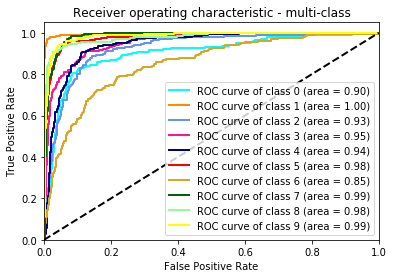

In [6]:
# Compute macro-average ROC curve and ROC area
lw =2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
"""plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)"""

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','deeppink','navy','red','goldenrod','darkgreen','palegreen','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - multi-class')
plt.legend(loc="lower right")
plt.show()

In [7]:
#Principal Component Analysis

from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)


C:\NivML\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.decomposition import PCA

fash_PCA = PCA(n_components = 600)
y_PCA = fash_PCA.fit_transform(X_std)

In [9]:
print(fash_PCA.explained_variance_)

[1.72802021e+02 1.13248016e+02 4.30384265e+01 3.95588321e+01
 3.12781200e+01 2.36100140e+01 2.19483559e+01 1.77389828e+01
 1.36295397e+01 1.09405981e+01 9.37002370e+00 7.59413081e+00
 7.49685208e+00 6.92456328e+00 6.41694325e+00 5.66335279e+00
 5.48181538e+00 5.04813478e+00 4.87087994e+00 4.82937192e+00
 4.40051734e+00 4.03446224e+00 3.78712453e+00 3.65460352e+00
 3.58315140e+00 3.42645761e+00 3.30690226e+00 3.16192382e+00
 3.07169418e+00 2.97148364e+00 2.84663168e+00 2.76783899e+00
 2.64220279e+00 2.62249862e+00 2.58910287e+00 2.48101096e+00
 2.42819812e+00 2.37055819e+00 2.30122897e+00 2.16202237e+00
 2.13614195e+00 2.08235533e+00 2.03722330e+00 2.01807540e+00
 1.94761800e+00 1.88963631e+00 1.83979015e+00 1.77732014e+00
 1.75581110e+00 1.70371156e+00 1.69012615e+00 1.63802167e+00
 1.60088152e+00 1.57875639e+00 1.53604816e+00 1.49122240e+00
 1.47961058e+00 1.42354155e+00 1.39803850e+00 1.36381109e+00
 1.34452896e+00 1.33578740e+00 1.32988564e+00 1.32189608e+00
 1.27535376e+00 1.261149

In [15]:
exp_var = fash_PCA.explained_variance_[:100]
cum_var = np.cumsum(exp_var)

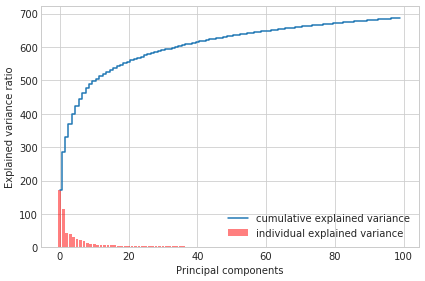

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(100), exp_var, alpha=0.5, align='center',color ='r',
            label='individual explained variance')
    plt.step(range(100), cum_var, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [32]:
#HIT annotated data.

hitdata=pd.read_csv("HITdata.csv")
print(hitdata.shape)

(309, 785)


In [33]:
hX = hitdata.loc[:,df_fashion.columns != "label"].values
hY = hitdata["label"].values
print(hX.shape,hY.shape)


(309, 784) (309,)


In [38]:
#Logistic Regression
start = time.time()
accres=[]
agg_cm_lr = np.zeros(shape =(10,10))

cv  = cross_validation.KFold(len(hX), n_folds = 10)
for ix, (traincv,testcv) in enumerate(cv):
    lr = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")#, C=10)
    lr.fit(hX[traincv],hY[traincv])
    pred_y_lr = lr.predict(hX[testcv])
    #Calculating Accuracy
    accres.append(accuracy_score(pred_y_lr,Y[testcv]))
    
    #Confusion matrix
    cm_lr = confusion_matrix(Y[testcv],pred_y_lr)
    #print(cm_lr)
    agg_cm_lr += cm_lr
    
end = time.time()
pred_y_lr = lr.predict(hX[testcv])
print("Logistic Regression - 10 fold scores are: ", accres)
print("Average Accuracy: ",np.mean(accres))
print(classification_report(pred_y_lr,hY[testcv]))
print("\n ------------------Contingency Table-------------------")
print(agg_cm_lr)
print("\n ------------------------------------------------------")
print("Time taken for the algorithm : ", end-start, " s")

Logistic Regression - 10 fold scores are:  [0.16129032258064516, 0.1935483870967742, 0.06451612903225806, 0.03225806451612903, 0.03225806451612903, 0.12903225806451613, 0.0967741935483871, 0.1935483870967742, 0.16129032258064516, 0.0]
Average Accuracy:  0.1064516129032258
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       1.00      1.00      1.00         4
          2       0.80      0.57      0.67         7
          3       0.67      1.00      0.80         2
          4       0.50      0.67      0.57         3
          5       0.50      0.50      0.50         2
          6       0.00      0.00      0.00         0
          7       1.00      0.80      0.89         5
          8       0.75      1.00      0.86         3

avg / total       0.82      0.73      0.76        30


 ------------------Contingency Table-------------------
[[4. 1. 7. 4. 3. 3. 0. 6. 1. 5.]
 [2. 1. 1. 2. 6. 2. 3. 5. 1. 3.]
 [3. 0. 5. 3. 7. 1

C:\NivML\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
